# K-Means Clustering of Different Regions in Chicago 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import glob
import geopandas as gp
import plotly.graph_objects as go
import plotly.express as px
plt.rcParams['figure.figsize'] = (12,9)
plt.rcParams['figure.facecolor']='w'
plt.rcParams['font.family'] = "serif"
import warnings
warnings.filterwarnings('ignore')

In [2]:
chicago = gp.read_file('processed_data/chicago_data_v03.shp')
chicago.head()

geoid10 commarea  commarea_n       H_a    H_amin  TOTAL POPU  \
0  17031842400       44        44.0  0.691932  2.513031        3304   
1  17031440201       44        44.0  0.691932  2.513031        5060   
2  17031440201       44        44.0  0.691932  2.513031        5060   
3  17031440202       44        44.0  0.691932  2.513031        2999   
4  17031440102       44        44.0  0.691932  2.513031        3127   

   crime_coun  is_violent  tract_area  pct_park  ...  existing_i  COMMUNITY  \
0         731         310    1.968638  0.028370  ...         2.0    Chatham   
1         673         318    0.531537  0.000000  ...         0.0    Chatham   
2         673         318    0.531537  0.000000  ...         0.0    Chatham   
3         383         152    0.781699  0.033547  ...         5.0    Chatham   
4         547         241    0.627504  0.000000  ...         0.0    Chatham   

   PERCENT OF  PERCENT HO  PERCENT AG  PER CAPITA  HARDSHIP I  PERCENT_CA  \
0         3.3        27.8        40.3       18881        60.0    0.207434   
1         3.3        27.8        40.3       18881        60.0    0.257077   
2         3.3        27.8        40.3       18881        60.0    0.257077   
3         3.3        27.8        40.3       18881        60.0    0.371764   
4         3.3        27.8        40.3       18881        60.0    0.350394   

  EBF_PFS                                           geometry  
0    0.88  POLYGON ((-87.62405 41.73022, -87.62405 41.730...  
1    0.72  POLYGON ((-87.61235 41.74568, -87.61234 41.745...  
2    0.72  POLYGON ((-87.61235 41.74568, -87.61234 41.745...  
3    0.73  POLYGON ((-87.60852 41.73660, -87.60875 41.736...  
4    0.84  POLYGON ((-87.59956 41.74540, -87.59890 41.745...  

[5 rows x 27 columns]

In [3]:
chicago.columns

Index(['geoid10', 'commarea', 'commarea_n', 'H_a', 'H_amin', 'TOTAL POPU',
       'crime_coun', 'is_violent', 'tract_area', 'pct_park', 'n_churches',
       'n_public', 'n_private', 'n_librarie', 'percent_qu', 'number_of_',
       'kw_total', 'existing_i', 'COMMUNITY', 'PERCENT OF', 'PERCENT HO',
       'PERCENT AG', 'PER CAPITA', 'HARDSHIP I', 'PERCENT_CA', 'EBF_PFS',
       'geometry'],
      dtype='object')

In [4]:
chicago.columns = ['geoid10', 'commarea', 'commarea_n', 'H_a', 'H_amin', 'population',
       'crime_count', 'is_violent', 'tract_area', 'pct_park', 'n_churches',
       'n_public', 'n_private', 'n_libraries', 'percent_qualified', 'n_panels',
       'kw_total', 'existing_installed', 'comm_name', 'pct_crowded', 'pct_poverty',
       'pct_over65_under18', 'percap_income', 'hardship_index', 'pct_treecanopy', 'pct_energyburden','geometry']

In [5]:
chicago.head()

geoid10 commarea  commarea_n       H_a    H_amin  population  \
0  17031842400       44        44.0  0.691932  2.513031        3304   
1  17031440201       44        44.0  0.691932  2.513031        5060   
2  17031440201       44        44.0  0.691932  2.513031        5060   
3  17031440202       44        44.0  0.691932  2.513031        2999   
4  17031440102       44        44.0  0.691932  2.513031        3127   

   crime_count  is_violent  tract_area  pct_park  ...  existing_installed  \
0          731         310    1.968638  0.028370  ...                 2.0   
1          673         318    0.531537  0.000000  ...                 0.0   
2          673         318    0.531537  0.000000  ...                 0.0   
3          383         152    0.781699  0.033547  ...                 5.0   
4          547         241    0.627504  0.000000  ...                 0.0   

   comm_name  pct_crowded  pct_poverty  pct_over65_under18  percap_income  \
0    Chatham          3.3         27.8                40.3          18881   
1    Chatham          3.3         27.8                40.3          18881   
2    Chatham          3.3         27.8                40.3          18881   
3    Chatham          3.3         27.8                40.3          18881   
4    Chatham          3.3         27.8                40.3          18881   

   hardship_index  pct_treecanopy pct_energyburden  \
0            60.0        0.207434             0.88   
1            60.0        0.257077             0.72   
2            60.0        0.257077             0.72   
3            60.0        0.371764             0.73   
4            60.0        0.350394             0.84   

                                            geometry  
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...  
1  POLYGON ((-87.61235 41.74568, -87.61234 41.745...  
2  POLYGON ((-87.61235 41.74568, -87.61234 41.745...  
3  POLYGON ((-87.60852 41.73660, -87.60875 41.736...  
4  POLYGON ((-87.59956 41.74540, -87.59890 41.745...  

[5 rows x 27 columns]

In [6]:
normalized_data = chicago[['geoid10',
                           'H_amin', 
                           'population',
                           'crime_count', 
                           'pct_treecanopy', 
                           'n_churches', 
                           'n_public', 
                           'percent_qualified', 
                           'pct_crowded', 
                           'pct_over65_under18', 
                           'pct_energyburden']].copy()
normalized_data.head()

geoid10    H_amin  population  crime_count  pct_treecanopy  n_churches  \
0  17031842400  2.513031        3304          731        0.207434         3.0   
1  17031440201  2.513031        5060          673        0.257077         3.0   
2  17031440201  2.513031        5060          673        0.257077         3.0   
3  17031440202  2.513031        2999          383        0.371764         4.0   
4  17031440102  2.513031        3127          547        0.350394         3.0   

   n_public  percent_qualified  pct_crowded  pct_over65_under18  \
0       3.0          84.905660          3.3                40.3   
1       0.0           0.000000          3.3                40.3   
2       0.0          93.375000          3.3                40.3   
3       2.0          85.555556          3.3                40.3   
4       1.0          88.661710          3.3                40.3   

   pct_energyburden  
0              0.88  
1              0.72  
2              0.72  
3              0.73  
4              0.84

In [7]:
normalized_data.fillna(0, inplace=True)

In [8]:
for col in normalized_data.columns:
    if col in ['geoid10', 'comm_name']:
        continue
    else:
        normalized_data[col] = normalized_data[col]/normalized_data[col].max()

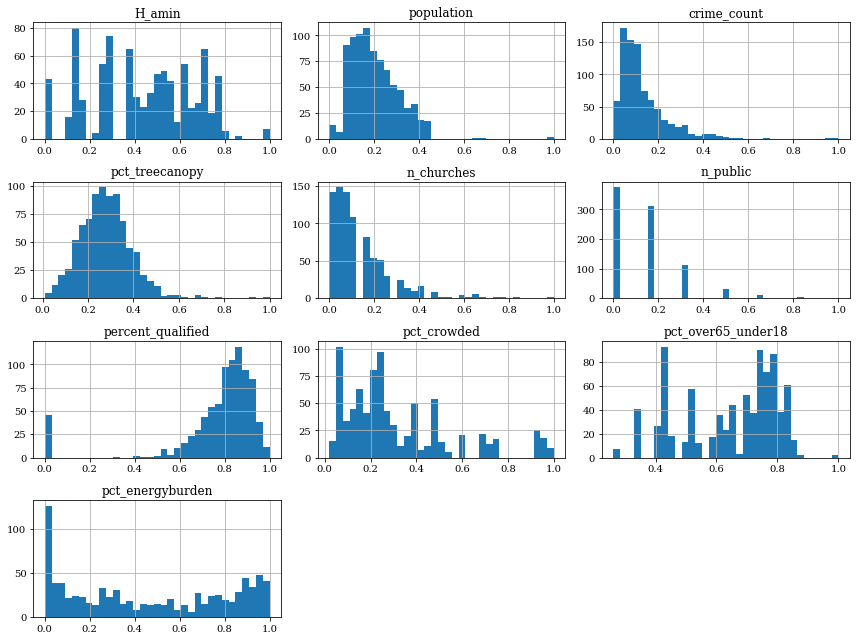

In [9]:
normalized_data.iloc[:,1:].hist(bins=33)
plt.tight_layout()

In [10]:
mitigating = ['pct_treecanopy','n_public','n_churches']
normalized_data[mitigating] = 1-normalized_data[mitigating]

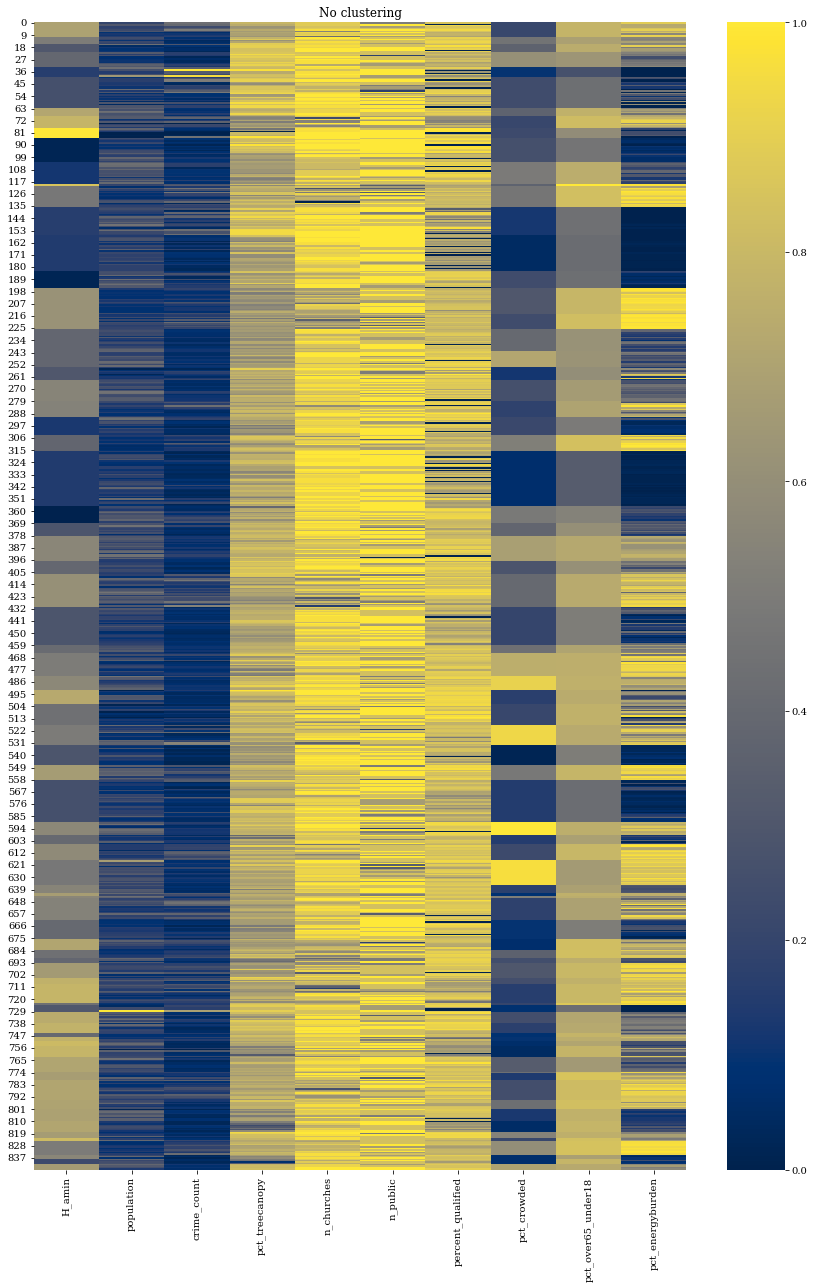

In [11]:
data = normalized_data.iloc[:,1:]
# data.drop('')
cmap = 'cividis'
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(1,figsize=(12,18))
sb.heatmap(ax=axes,data=data, cmap=cmap)
# sb.heatmap(ax=axes[1],data=tpose.sort_values(by='cluster'), cmap='plasma')
# sb.heatmap(ax=axes[1],data=sorted_T, cmap=cmap)

colors=['tab:red','tab:blue','tab:green','yellow','tab:purple', 'tab:pink','tab:orange','tab:cyan','magenta',
        'lightgreen']

# for i, h in enumerate(heights):
#     name_idx=sorted_T[sorted_T.cluster==i].index.values[0]
#     idx = np.where(sorted_T.index==name_idx)[0][0]
    
#     axes[1].add_patch(Rectangle((0,idx), 
#                                 width=L, 
#                                 height=h, 
#                                 fill=False, 
#                                 edgecolor=colors[i], 
#                                 lw=2, 
#                                 clip_on=False))
    
axes.set_title('No clustering')
# axes[1].set_title('Clustered with Agglomerative Clustering')
plt.tight_layout()

In [12]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

In [13]:
X = data.iloc[:,:].values
X

array([[0.69789946, 0.19743053, 0.4353782 , ..., 0.20886076, 0.78252427,
        0.88888889],
       [0.69789946, 0.30236032, 0.40083383, ..., 0.20886076, 0.78252427,
        0.72727273],
       [0.69789946, 0.30236032, 0.40083383, ..., 0.20886076, 0.78252427,
        0.72727273],
       ...,
       [0.66706003, 0.31060651, 0.07147111, ..., 0.70253165, 0.73203883,
        0.66666667],
       [0.66706003, 0.25628921, 0.10125074, ..., 0.70253165, 0.73203883,
        0.52525253],
       [0.66706003, 0.13283537, 0.064324  , ..., 0.70253165, 0.73203883,
        0.56565657]])

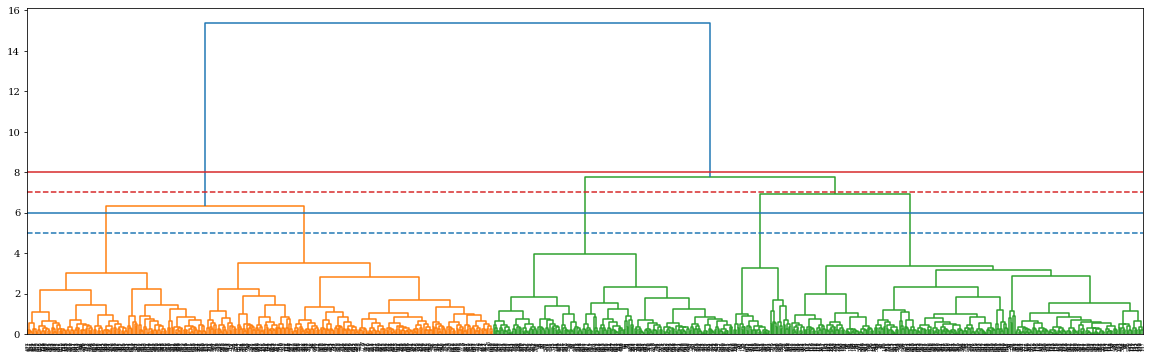

In [14]:
fig, ax = plt.subplots(figsize=(20,6))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'),ax=ax)
ax.axhline(y=6)
ax.axhline(y=5, color='tab:blue', linestyle='--')
ax.axhline(y=8, color='tab:red')
ax.axhline(y=7, color='tab:red', linestyle='--')
plt.show()

In [15]:
N_clusters = 6
model = AgglomerativeClustering(n_clusters=N_clusters, affinity='euclidean', linkage='ward')
model.fit(X)
labels = model.labels_

In [16]:
np.unique(labels)

array([0, 1, 2, 3, 4, 5])

In [17]:
tpose = data.copy()

In [18]:
tpose['cluster'] = labels
tpose.head(6)

H_amin  population  crime_count  pct_treecanopy  n_churches  n_public  \
0  0.697899    0.197431     0.435378        0.792566    0.884615  0.500000   
1  0.697899    0.302360     0.400834        0.742923    0.884615  1.000000   
2  0.697899    0.302360     0.400834        0.742923    0.884615  1.000000   
3  0.697899    0.179205     0.228112        0.628236    0.846154  0.666667   
4  0.697899    0.186854     0.325789        0.649606    0.884615  0.833333   
5  0.697899    0.223842     0.501489        0.734071    0.961538  1.000000   

   percent_qualified  pct_crowded  pct_over65_under18  pct_energyburden  \
0           0.849057     0.208861            0.782524          0.888889   
1           0.000000     0.208861            0.782524          0.727273   
2           0.933750     0.208861            0.782524          0.727273   
3           0.855556     0.208861            0.782524          0.737374   
4           0.886617     0.208861            0.782524          0.848485   
5           0.940701     0.208861            0.782524          0.898990   

   cluster  
0        0  
1        3  
2        0  
3        0  
4        0  
5        0

In [19]:
grouped = tpose.groupby(tpose['cluster'])
heights = []
for g in grouped.groups:
    print(g)
    heights.append(len(grouped.get_group(g)))
heights

0
1
2
3
4
5


[217, 267, 114, 44, 136, 68]

In [20]:
sorted_T = tpose.sort_values(by='cluster')
L = len(tpose.T)

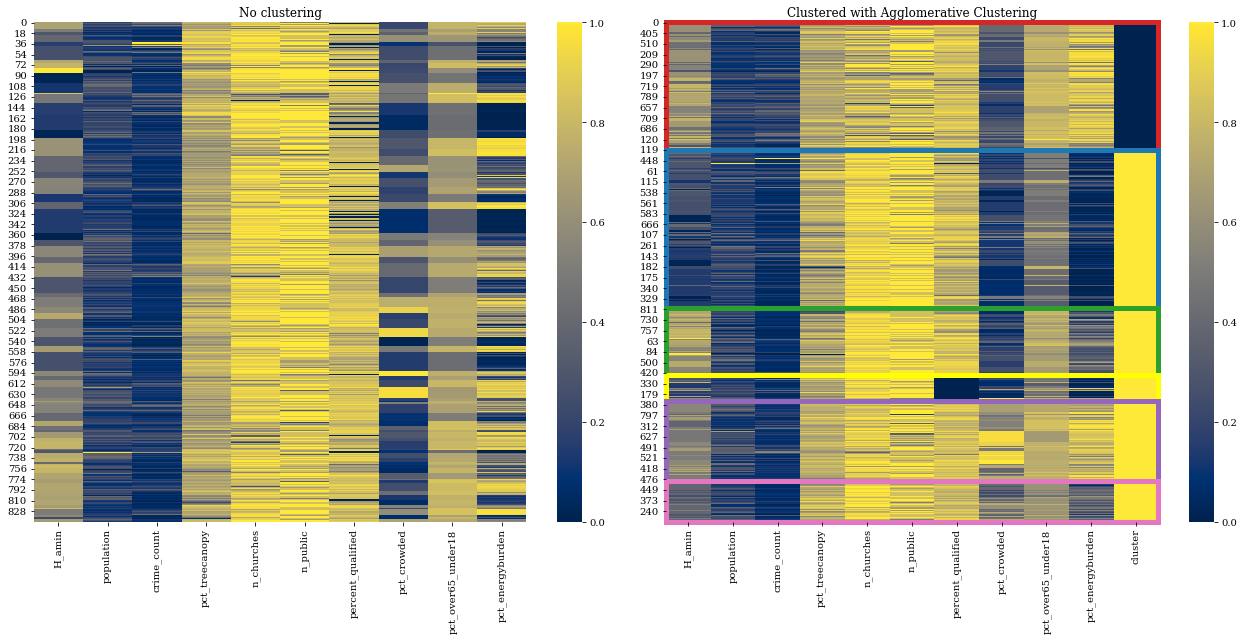

In [21]:
# cmap = 'magma'
from matplotlib.patches import Rectangle
fig, axes = plt.subplots(1,2,figsize=(18,9))
sb.heatmap(ax=axes[0],data=data, cmap=cmap)
# sb.heatmap(ax=axes[1],data=tpose.sort_values(by='cluster'), cmap='plasma')
sb.heatmap(ax=axes[1],data=sorted_T, cmap=cmap, vmin=0, vmax=1)

colors=['tab:red','tab:blue','tab:green','yellow','tab:purple', 'tab:pink','tab:orange','tab:cyan','magenta',
        'lightgreen']

for i, h in enumerate(heights):
    name_idx=sorted_T[sorted_T.cluster==i].index.values[0]
    idx = np.where(sorted_T.index==name_idx)[0][0]
    
    axes[1].add_patch(Rectangle((0,idx), 
                                width=L, 
                                height=h, 
                                fill=False, 
                                edgecolor=colors[i], 
                                lw=5, 
                                clip_on=False))
    
axes[0].set_title('No clustering')
axes[1].set_title('Clustered with Agglomerative Clustering')
plt.tight_layout()

In [22]:
tpose.groupby('cluster').mean().sum(axis=1)

cluster
0    5.945450
1    4.564732
2    5.581836
3    4.102315
4    6.489352
5    5.433213
dtype: float64

In [23]:
chicago['h_cluster']=tpose['cluster'].values

In [24]:
order = [4,0,2,5,1,3]

In [25]:
def rank(x):
    order = {4:0,
             0:1,
             2:2,
             5:3,
             1:4,
             3:5}
    
    return order[x]

In [26]:
chicago['priority'] = chicago['h_cluster'].apply(rank)

In [27]:
chicago.head()

geoid10 commarea  commarea_n       H_a    H_amin  population  \
0  17031842400       44        44.0  0.691932  2.513031        3304   
1  17031440201       44        44.0  0.691932  2.513031        5060   
2  17031440201       44        44.0  0.691932  2.513031        5060   
3  17031440202       44        44.0  0.691932  2.513031        2999   
4  17031440102       44        44.0  0.691932  2.513031        3127   

   crime_count  is_violent  tract_area  pct_park  ...  pct_crowded  \
0          731         310    1.968638  0.028370  ...          3.3   
1          673         318    0.531537  0.000000  ...          3.3   
2          673         318    0.531537  0.000000  ...          3.3   
3          383         152    0.781699  0.033547  ...          3.3   
4          547         241    0.627504  0.000000  ...          3.3   

   pct_poverty  pct_over65_under18  percap_income  hardship_index  \
0         27.8                40.3          18881            60.0   
1         27.8                40.3          18881            60.0   
2         27.8                40.3          18881            60.0   
3         27.8                40.3          18881            60.0   
4         27.8                40.3          18881            60.0   

   pct_treecanopy  pct_energyburden  \
0        0.207434              0.88   
1        0.257077              0.72   
2        0.257077              0.72   
3        0.371764              0.73   
4        0.350394              0.84   

                                            geometry h_cluster  priority  
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...         0         1  
1  POLYGON ((-87.61235 41.74568, -87.61234 41.745...         3         5  
2  POLYGON ((-87.61235 41.74568, -87.61234 41.745...         0         1  
3  POLYGON ((-87.60852 41.73660, -87.60875 41.736...         0         1  
4  POLYGON ((-87.59956 41.74540, -87.59890 41.745...         0         1  

[5 rows x 29 columns]

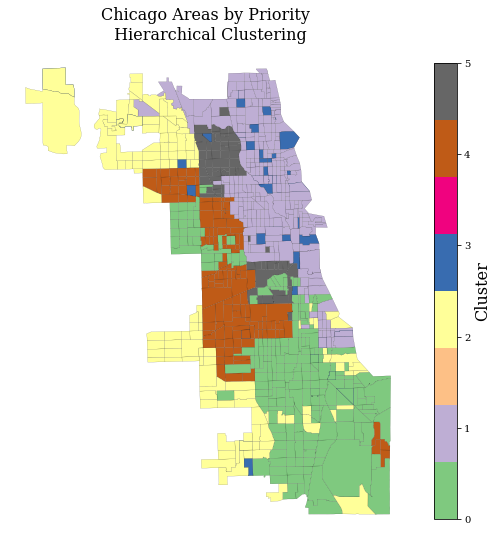

In [48]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=5)
cmap = 'Accent'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, edgecolor='k',column='h_cluster', norm=norm, cmap=cmap, legend=False, lw=0.1)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Cluster', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Areas by Priority \n Hierarchical Clustering', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/clustering.eps', format='eps')

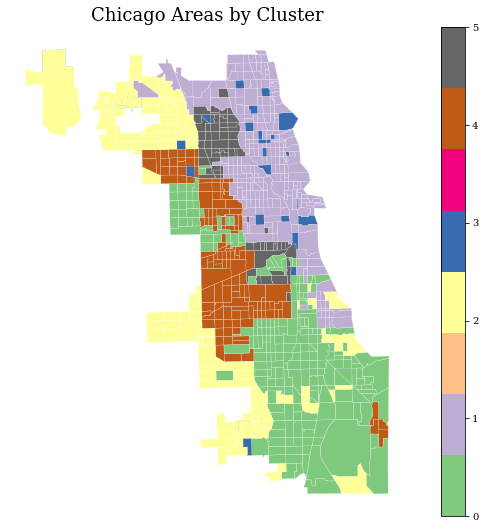

In [28]:
fig, ax = plt.subplots()
chicago.plot(ax=ax,column='h_cluster', legend=True, cmap='Accent', vmin=0, vmax=5, edgecolor='w', linewidth=0.2)
ax.set_title("Chicago Areas by Cluster", fontsize=18)
ax.set_axis_off()

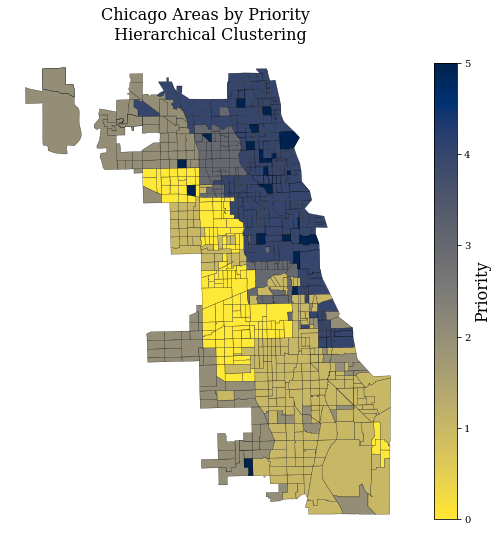

In [47]:
import matplotlib.colors as colors
fig, ax = plt.subplots(figsize=(9,12))
norm = colors.Normalize(vmin=0, vmax=5)
cmap = 'cividis_r'
cbar = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
chicago.plot(ax=ax, edgecolor='k',column='priority', norm=norm, cmap=cmap, legend=False, lw=0.25)
ax_cbar = fig.colorbar(cbar, ax=ax, shrink=0.7)
ax_cbar.set_label(r'Priority', fontsize=16)
# counties.centroid.plot(ax=ax, color='tab:red')
ax.set_title('Chicago Areas by Priority \n Hierarchical Clustering', fontsize=16)
ax.set_axis_off()
plt.savefig('../chicago-solar/paper/figures/clustering_priority.eps', format='eps')

In [30]:
df = tpose.groupby('cluster').mean()

In [31]:
df.loc[0].values.flatten().tolist()

[0.6038932859416005,
 0.1728712279653421,
 0.19099310265326902,
 0.7128224822429272,
 0.7587734845799362,
 0.8102918586789555,
 0.8173738121049401,
 0.26949775418538174,
 0.7775312066574203,
 0.8314015733370572]

In [32]:
df

H_amin  population  crime_count  pct_treecanopy  n_churches  \
cluster                                                                  
0        0.603893    0.172871     0.190993        0.712822    0.758773   
1        0.194945    0.202567     0.118898        0.718584    0.914434   
2        0.681116    0.212914     0.079292        0.692897    0.920378   
3        0.307398    0.214480     0.124723        0.722529    0.890734   
4        0.536672    0.229843     0.132857        0.758309    0.875283   
5        0.366367    0.222186     0.080641        0.742802    0.920249   

         n_public  percent_qualified  pct_crowded  pct_over65_under18  \
cluster                                                                 
0        0.810292           0.817374     0.269498            0.777531   
1        0.894507           0.779996     0.173920            0.474725   
2        0.903509           0.842600     0.190262            0.718004   
3        0.909091           0.000000     0.207854            0.525552   
4        0.832108           0.844231     0.727290            0.753370   
5        0.852941           0.822541     0.456348            0.616048   

         pct_energyburden  
cluster                    
0                0.831402  
1                0.092158  
2                0.340865  
3                0.199954  
4                0.799391  
5                0.353090

In [49]:
from math import pi
def make_spider( row, header, color, fill_color):

    categories=list(df)
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[row].values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    ax = plt.subplot(111, polar=True, facecolor='lightgrey')

    # Draw one axe per variable + add labels
    tick_labs = ['Temperature', 'Population', 'Crime','Tree \n Cover', 
                 'Churches', 'Public \n Schools', 'Solar \n Potential', 
                 'Crowding', 'Old+Young', 'Energy \n Burden']
#     ax.set_xticklabels(tick_labs)
    plt.xticks(angles[:-1], tick_labs, color='k', size=12)
    ax.tick_params(axis='x', which='major', pad=30)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="k", size=12)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=1, linestyle='solid', marker='o', color=color, label=f'Group {row}')

    # Fill area
#     ax.fill(angles, values, fill_color, alpha=0.1)
    ax.fill(angles, values, 'b', alpha=0.1)
    
    ax.set_title(header, size=16,y=1.1)
    
    ax.legend()

#     print(categories)
#     print(tick_labs)
    
    # Show the graph
    plt.tight_layout()
    
#     plt.savefig(f'../chicago-solar/paper/figures/group_{row}_plot.eps', format='eps')
    
    plt.show()


In [107]:
from math import pi
def make_spider_multi( row, header, color, fill_color, ax):

    categories=list(df)
    N = len(categories)

    # We are going to plot the first line of the data frame.
    # But we need to repeat the first value to close the circular graph:
    values=df.loc[row].values.flatten().tolist()
    values += values[:1]
    values

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Initialise the spider plot
    

    # Draw one axe per variable + add labels
    tick_labs = ['Temperature', 'Population', 'Crime','Tree \n Cover', 
                 'Churches', 'Public \n Schools', 'Solar \n Potential', 
                 'Crowding', 'Old+Young', 'Energy \n Burden']
#     ax.set_xticklabels(tick_labs)
    plt.xticks(angles[:-1], tick_labs, color='k', size=12)
    ax.tick_params(axis='x', which='major', pad=30)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.25,0.5,0.75], ["0.25","0.5","0.75"], color="k", size=12)
    plt.ylim(0,1)

    # Plot data
    ax.plot(angles, values, linewidth=3, linestyle='solid', marker='o', color=color, label=f'Group {row}')

    # Fill area
#     ax.fill(angles, values, fill_color, alpha=0.1)
#     ax.fill(angles, values, 'b', alpha=0.1)
    
#     ax.set_title(header, size=16,y=1.1)
    
#     ax.legend()

#     print(categories)
#     print(tick_labs)
    
    # Show the graph
#     plt.tight_layout()
    
#     plt.savefig(f'../chicago-solar/paper/figures/group_{row}_plot.eps', format='eps')
    
#     plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


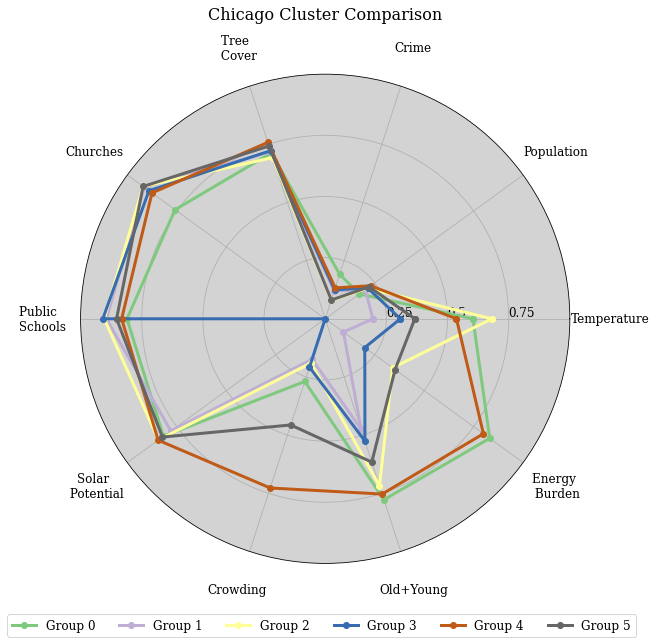

In [109]:
my_dpi=96
plt.figure(figsize=(9,9))
axes = plt.subplot(111, polar=True, facecolor='lightgrey')
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Accent", 6)
mp2 = plt.cm.get_cmap("Set1", 5)
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider_multi( row=row, header='group '+str(row), color=my_palette(row), fill_color=mp2(row), ax=axes)
    
    
labels = [f'Group {n+1}' for n in range(5)]
plt.legend(loc=(-0.15, -0.15), ncol=6, fontsize=12)
# ax.legend(labels, loc=0,frameon=True)
plt.title('Chicago Cluster Comparison', y=1.1, fontsize=16)
plt.savefig(f'../chicago-solar/paper/figures/cluster_comparison.eps', format='eps')
plt.show()

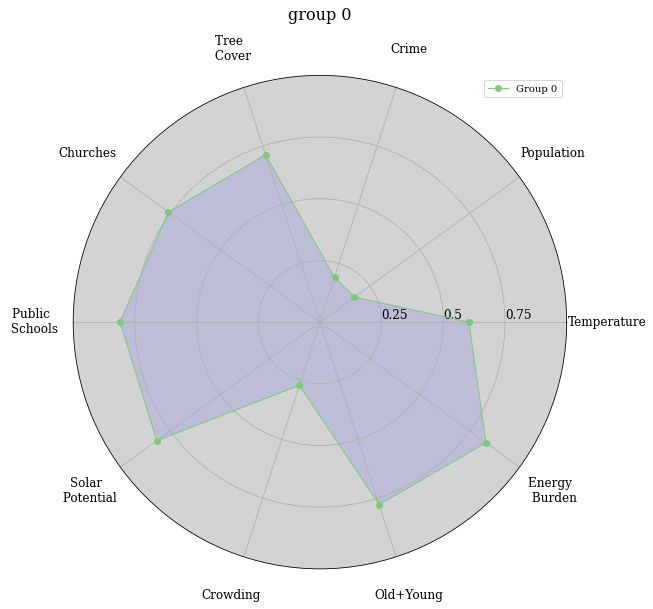

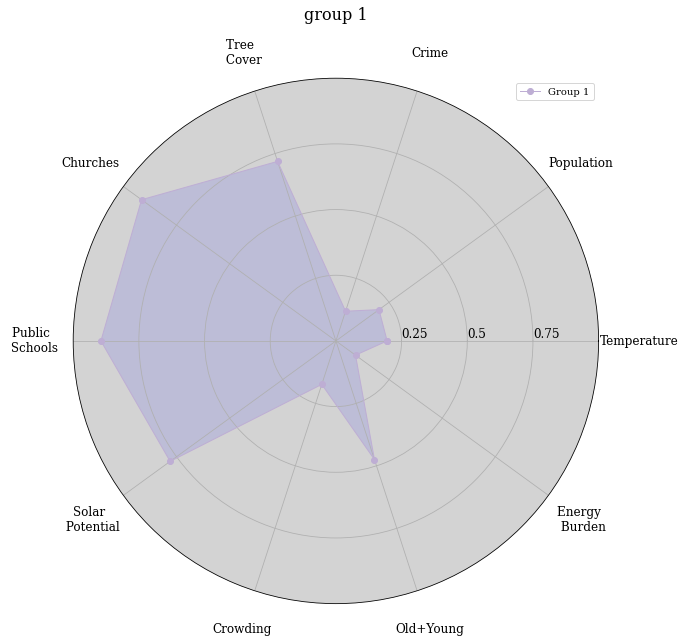

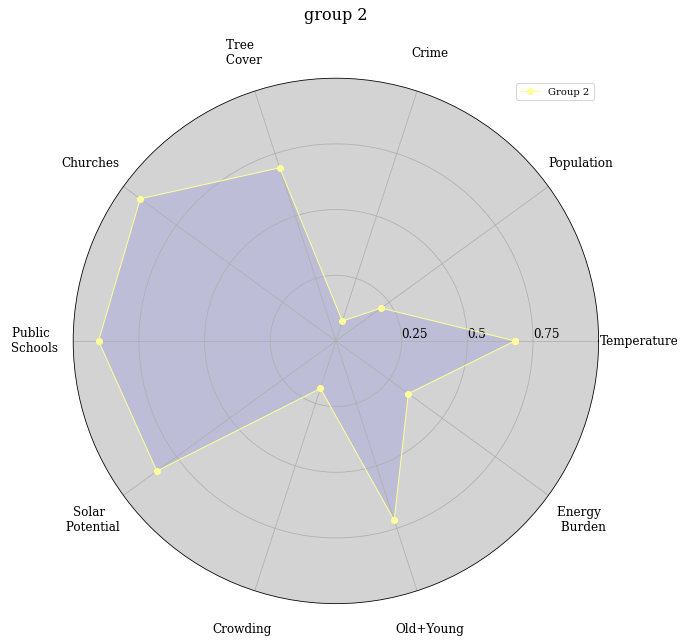

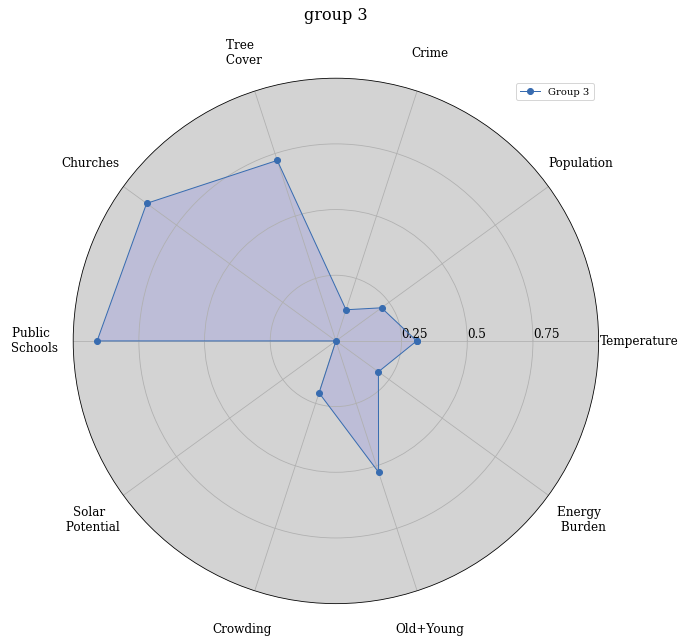

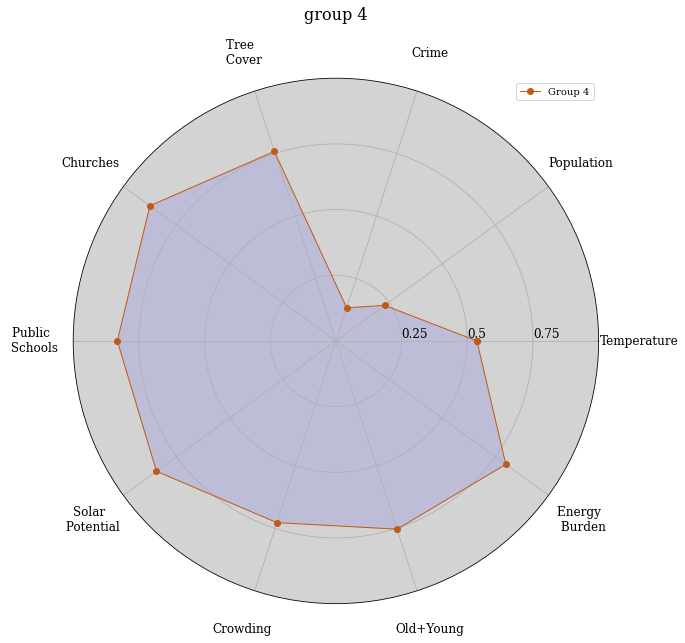

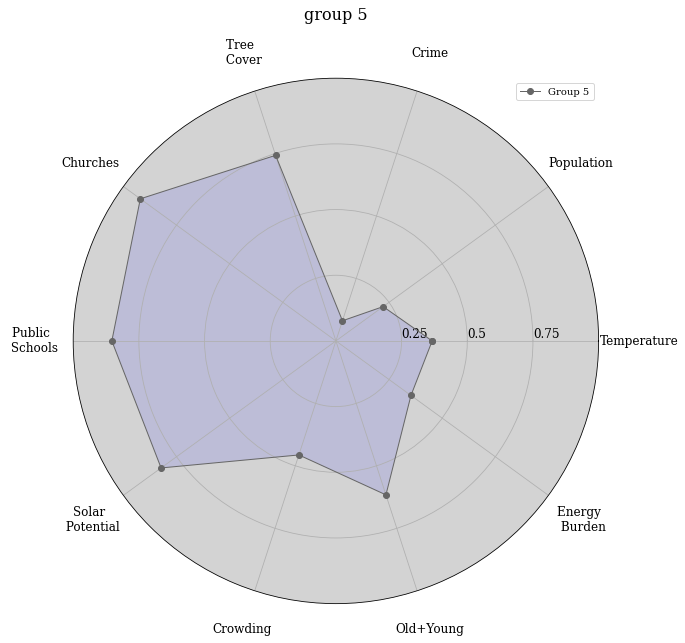

In [54]:
my_dpi=96
plt.figure(figsize=(9,9))
ax = plt.subplot(111, polar=True, facecolor='lightgrey')
 
# Create a color palette:
my_palette = plt.cm.get_cmap("Accent", 6)
mp2 = plt.cm.get_cmap("Set1", 5)
 
# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, header='group '+str(row), color=my_palette(row), fill_color=mp2(row))

In [35]:
for g in grouped.groups:
    cluster = grouped.get_group(g).iloc[:,:-1]
    clusterMean = pd.DataFrame(cluster.mean(axis=0))
    rdata = cluster.T.iloc[:-1,:].reset_index()
    print(clusterMean.sum())
    categories = clusterMean.index.values
    # plot
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(r=clusterMean.iloc[:,0],theta=categories,fill='toself',name=f'Cluster Mean {g}'))
#     for col in rdata:
#         fig.add_trace(go.Scatterpolar(r=rdata[col],theta=categories,name=f'Census Tract {col}'))
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )

    fig.show()

0    5.94545
dtype: float64


0    4.564732
dtype: float64


0    5.581836
dtype: float64


0    4.102315
dtype: float64


0    6.489352
dtype: float64


0    5.433213
dtype: float64


import plotly.graph_objects as go

categories = clusterMean.index.values
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r=clusterMean.iloc[:,0],theta=categories,fill='toself',name='Cluster Mean'))
for col in radar_data1:
    fig.add_trace(go.Scatterpolar(r=radar_data1[col],theta=categories,name=f'Cluster {col}'))
    
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 1]
    )),
  showlegend=False
)

fig.show()

In [36]:
for g in grouped.groups:
    cluster = grouped.get_group(g).iloc[:,:-1]
    clusterMean = pd.DataFrame(cluster.mean(axis=0))
    rdata = cluster.T.iloc[:-1,:].reset_index()
    categories = clusterMean.index.values
    # plot
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(r=clusterMean.iloc[:,0],theta=categories,fill='toself',name=f'Cluster Mean {g}'))
    for col in rdata:
        fig.add_trace(go.Scatterpolar(r=rdata[col],theta=categories,name=f'Census Tract {col}'))
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )

    fig.show()

In [37]:
for g in grouped.groups:
    cluster = grouped.get_group(g).iloc[:,:-1]
    clusterMean = pd.DataFrame(cluster.mean(axis=0))
    rdata = cluster.T.iloc[:-1,:].reset_index()
    print(clusterMean.sum())
    categories = clusterMean.index.values
    # plot
    fig = go.Figure()

    fig.add_trace(go.Scatterpolar(r=clusterMean.iloc[:,0],theta=categories,fill='toself',name=f'Cluster Mean {g}'))
#     for col in rdata:
#         fig.add_trace(go.Scatterpolar(r=rdata[col],theta=categories,name=f'Census Tract {col}'))
    fig.update_layout(
      polar=dict(
        radialaxis=dict(
          visible=True,
          range=[0, 1]
        )),
      showlegend=True
    )

    fig.show()

0    5.94545
dtype: float64


0    4.564732
dtype: float64


0    5.581836
dtype: float64


0    4.102315
dtype: float64


0    6.489352
dtype: float64


0    5.433213
dtype: float64


In [38]:
chicago.head()

geoid10 commarea  commarea_n       H_a    H_amin  population  \
0  17031842400       44        44.0  0.691932  2.513031        3304   
1  17031440201       44        44.0  0.691932  2.513031        5060   
2  17031440201       44        44.0  0.691932  2.513031        5060   
3  17031440202       44        44.0  0.691932  2.513031        2999   
4  17031440102       44        44.0  0.691932  2.513031        3127   

   crime_count  is_violent  tract_area  pct_park  ...  pct_crowded  \
0          731         310    1.968638  0.028370  ...          3.3   
1          673         318    0.531537  0.000000  ...          3.3   
2          673         318    0.531537  0.000000  ...          3.3   
3          383         152    0.781699  0.033547  ...          3.3   
4          547         241    0.627504  0.000000  ...          3.3   

   pct_poverty  pct_over65_under18  percap_income  hardship_index  \
0         27.8                40.3          18881            60.0   
1         27.8                40.3          18881            60.0   
2         27.8                40.3          18881            60.0   
3         27.8                40.3          18881            60.0   
4         27.8                40.3          18881            60.0   

   pct_treecanopy  pct_energyburden  \
0        0.207434              0.88   
1        0.257077              0.72   
2        0.257077              0.72   
3        0.371764              0.73   
4        0.350394              0.84   

                                            geometry h_cluster  priority  
0  POLYGON ((-87.62405 41.73022, -87.62405 41.730...         0         1  
1  POLYGON ((-87.61235 41.74568, -87.61234 41.745...         3         5  
2  POLYGON ((-87.61235 41.74568, -87.61234 41.745...         0         1  
3  POLYGON ((-87.60852 41.73660, -87.60875 41.736...         0         1  
4  POLYGON ((-87.59956 41.74540, -87.59890 41.745...         0         1  

[5 rows x 29 columns]

In [39]:
tpose

H_amin  population  crime_count  pct_treecanopy  n_churches  n_public  \
0    0.697899    0.197431     0.435378        0.792566    0.884615  0.500000   
1    0.697899    0.302360     0.400834        0.742923    0.884615  1.000000   
2    0.697899    0.302360     0.400834        0.742923    0.884615  1.000000   
3    0.697899    0.179205     0.228112        0.628236    0.846154  0.666667   
4    0.697899    0.186854     0.325789        0.649606    0.884615  0.833333   
..        ...         ...          ...             ...         ...       ...   
841  0.228936    0.264715     0.039309        0.319544    0.769231  0.833333   
842  0.667060    0.382372     0.109589        0.780516    0.923077  0.666667   
843  0.667060    0.310607     0.071471        0.808934    0.923077  0.833333   
844  0.667060    0.256289     0.101251        0.804051    1.000000  1.000000   
845  0.667060    0.132835     0.064324        0.823160    1.000000  1.000000   

     percent_qualified  pct_crowded  pct_over65_under18  pct_energyburden  \
0             0.849057     0.208861            0.782524          0.888889   
1             0.000000     0.208861            0.782524          0.727273   
2             0.933750     0.208861            0.782524          0.727273   
3             0.855556     0.208861            0.782524          0.737374   
4             0.886617     0.208861            0.782524          0.848485   
..                 ...          ...                 ...               ...   
841           0.812769     0.069620            0.786408          0.101010   
842           0.880415     0.702532            0.732039          0.565657   
843           0.850407     0.702532            0.732039          0.666667   
844           0.845884     0.702532            0.732039          0.525253   
845           0.905188     0.702532            0.732039          0.565657   

     cluster  
0          0  
1          3  
2          0  
3          0  
4          0  
..       ...  
841        1  
842        4  
843        4  
844        4  
845        4  

[846 rows x 11 columns]

In [40]:
chicago['score'] = tpose.iloc[0:,:-1].sum(axis=1)

In [41]:
chicago['score'].max()

7.371394556078682

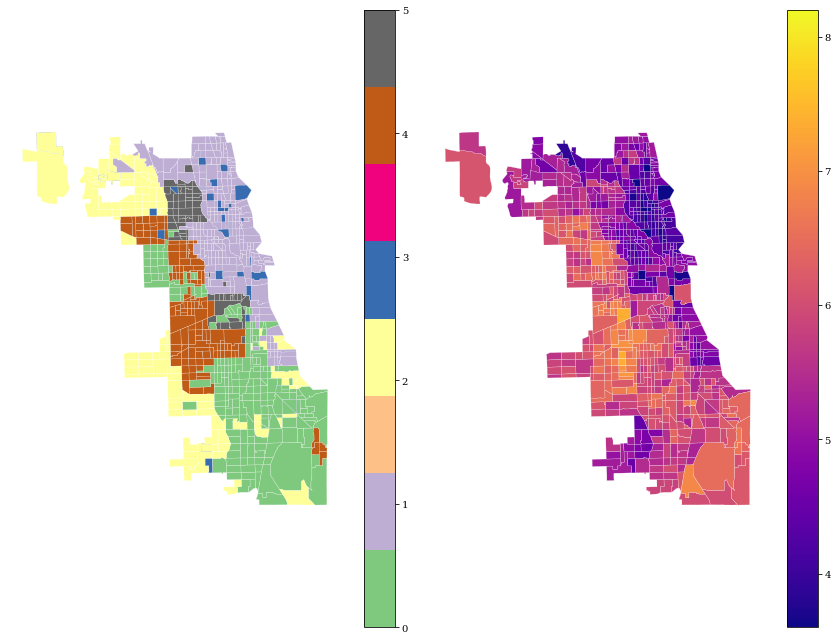

In [42]:
fig, axes = plt.subplots(1,2)
chicago.plot(ax=axes[0],column='h_cluster', legend=True, cmap='Accent', vmin=0, vmax=5, edgecolor='w', linewidth=0.2)
axes[0].set_axis_off()

chicago.plot(ax=axes[1],column='score', legend=True, cmap='plasma', vmin=3.6, vmax=8.2, edgecolor='w', linewidth=0.2)
axes[1].set_axis_off()

plt.tight_layout()

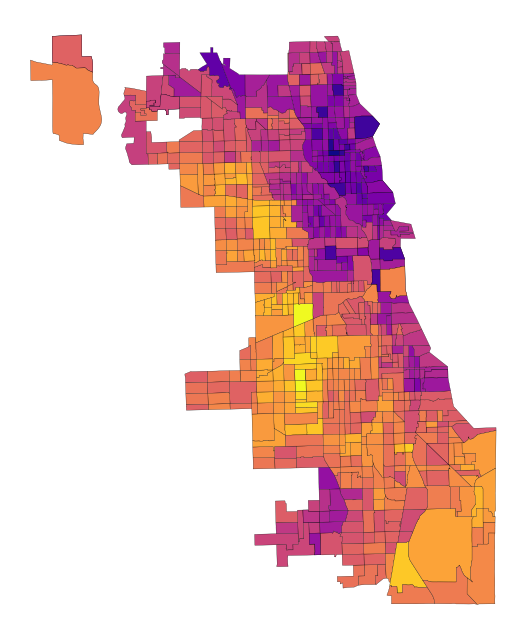

In [43]:
fig, axes = plt.subplots()

chicago.plot(ax=axes,column='score', legend=False, cmap='plasma',edgecolor='k', linewidth=0.25)
axes.set_axis_off()

plt.tight_layout()